<a href="https://colab.research.google.com/github/IlhomJabborov/Health-Detection/blob/main/CovidDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import  *
from ipywidgets import widgets

path =Path('train')

#DataBlock
transports = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#DataLoader
dls = transports.dataloaders(path)

#dataset
# dls.train.show_batch(max_n=32,nrows=4)

#Train(Learning)
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 134MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.054821,1.977529,0.527778,01:42


epoch,train_loss,valid_loss,accuracy,time
0,0.701788,1.092484,0.680556,02:17
1,0.454569,0.412049,0.875000,02:16
2,0.319895,0.224305,0.958333,02:17
3,0.248105,0.163764,0.958333,02:16


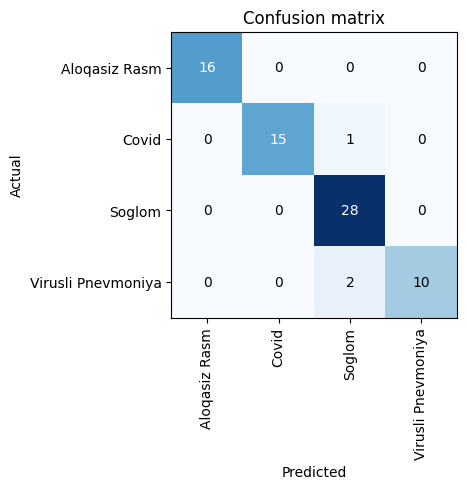

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat : Covid
Ehtimollik : 99.8%


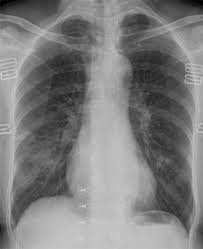

In [ ]:
img =PILImage.create(upload.data[-1])
pred,pred_id,probs = learn.predict(img)
print(f"Bashorat : {pred}")
print(f"Ehtimollik : {probs[pred_id]*100:.1f}%")
img

In [ ]:
#Save model
learn.export('covid_model.pkl')

In [ ]:
model = load_learner('/content/covid_model.pkl')
model.predict(img)

('Soglom', tensor(2), tensor([1.2613e-04, 3.1016e-03, 9.9671e-01, 6.2662e-05]))